In [33]:
import copy
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [38]:
gold_df = pd.read_csv('input\gold price org.CSV',thousands=',')
gold_df

,Date,USD
0,2014/9/17,1236.0
1,2014/9/18,1220.5
2,2014/9/19,1219.8
3,2014/9/22,1213.5
4,2014/9/23,1222.0
...,...,...
513,2016/9/5,1326.4
514,2016/9/6,1337.3
515,2016/9/7,1348.4
516,2016/9/8,1343.4


In [39]:
org_date = copy.deepcopy(gold_df['Date'].values)

In [40]:
gold_df['Date'] = pd.to_numeric(pd.to_datetime(gold_df['Date'])).values
gold_df['Date'] /= min([gold_df['Date'][i+1] - gold_df['Date'][i] for i in range(len(gold_df['Date']) - 1)])
gold_df['Date'] -= min(gold_df['Date'])
gold_df['Date'] = gold_df['Date'].astype(int)

In [41]:
tf_date = copy.deepcopy(gold_df['Date'].values)

In [42]:
del_list = [gold_df['Date'][i+1] - gold_df['Date'][i] for i in range(len(gold_df['Date']) - 1)]
set(del_list)

{1, 3}

In [43]:
gold_df.describe()

,Date,USD
count,518.000000,518.000000
mean,361.897683,1198.622008
std,209.548606,75.107314
min,0.000000,1049.400000
25%,181.250000,1147.550000
50%,362.500000,1199.000000
75%,543.250000,1241.000000
max,723.000000,1366.300000


In [44]:
nan_arr = gold_df['USD'].isna()
nan_arr

0      False
1      False
2      False
3      False
4      False
       ...  
513    False
514    False
515    False
516    False
517    False
Name: USD, Length: 518, dtype: bool

In [45]:
gold_df[~nan_arr]['Date'].values

array([  0,   1,   2,   5,   6,   7,   8,   9,  12,  13,  14,  15,  16,
        19,  20,  21,  22,  23,  26,  27,  28,  29,  30,  33,  34,  35,
        36,  37,  40,  41,  42,  43,  44,  47,  48,  49,  50,  51,  54,
        55,  56,  57,  58,  61,  62,  63,  64,  65,  68,  69,  70,  71,
        72,  75,  76,  77,  78,  79,  82,  83,  84,  85,  86,  89,  90,
        91,  92,  93,  96,  97,  98,  99, 100, 103, 104, 105, 106, 107,
       110, 111, 112, 113, 114, 117, 118, 119, 120, 121, 124, 125, 126,
       127, 128, 131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 145,
       146, 147, 148, 149, 152, 153, 154, 155, 156, 159, 160, 161, 162,
       163, 166, 167, 168, 169, 170, 173, 174, 175, 176, 177, 180, 181,
       182, 183, 184, 187, 188, 189, 190, 191, 194, 195, 196, 197, 198,
       201, 202, 203, 204, 205, 208, 209, 210, 211, 212, 215, 216, 217,
       218, 219, 222, 223, 224, 225, 226, 229, 230, 231, 232, 233, 236,
       237, 238, 239, 240, 243, 244, 245, 246, 247, 250, 251, 25

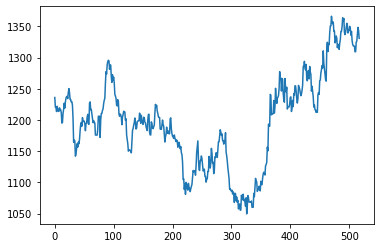

In [47]:
sns.lineplot(data=gold_df['USD'].values)
plt.show()

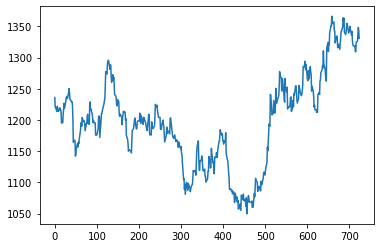

In [53]:
plt.plot(gold_df['Date'], gold_df['USD'])
plt.show()

In [54]:
org_date

array(['2014/9/17', '2014/9/18', '2014/9/19', '2014/9/22', '2014/9/23',
       '2014/9/24', '2014/9/25', '2014/9/26', '2014/9/29', '2014/9/30',
       '2014/10/1', '2014/10/2', '2014/10/3', '2014/10/6', '2014/10/7',
       '2014/10/8', '2014/10/9', '2014/10/10', '2014/10/13', '2014/10/14',
       '2014/10/15', '2014/10/16', '2014/10/17', '2014/10/20',
       '2014/10/21', '2014/10/22', '2014/10/23', '2014/10/24',
       '2014/10/27', '2014/10/28', '2014/10/29', '2014/10/30',
       '2014/10/31', '2014/11/3', '2014/11/4', '2014/11/5', '2014/11/6',
       '2014/11/7', '2014/11/10', '2014/11/11', '2014/11/12',
       '2014/11/13', '2014/11/14', '2014/11/17', '2014/11/18',
       '2014/11/19', '2014/11/20', '2014/11/21', '2014/11/24',
       '2014/11/25', '2014/11/26', '2014/11/27', '2014/11/28',
       '2014/12/1', '2014/12/2', '2014/12/3', '2014/12/4', '2014/12/5',
       '2014/12/8', '2014/12/9', '2014/12/10', '2014/12/11', '2014/12/12',
       '2014/12/15', '2014/12/16', '2014/12/17', 

In [55]:
tf_date

array([  0,   1,   2,   5,   6,   7,   8,   9,  12,  13,  14,  15,  16,
        19,  20,  21,  22,  23,  26,  27,  28,  29,  30,  33,  34,  35,
        36,  37,  40,  41,  42,  43,  44,  47,  48,  49,  50,  51,  54,
        55,  56,  57,  58,  61,  62,  63,  64,  65,  68,  69,  70,  71,
        72,  75,  76,  77,  78,  79,  82,  83,  84,  85,  86,  89,  90,
        91,  92,  93,  96,  97,  98,  99, 100, 103, 104, 105, 106, 107,
       110, 111, 112, 113, 114, 117, 118, 119, 120, 121, 124, 125, 126,
       127, 128, 131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 145,
       146, 147, 148, 149, 152, 153, 154, 155, 156, 159, 160, 161, 162,
       163, 166, 167, 168, 169, 170, 173, 174, 175, 176, 177, 180, 181,
       182, 183, 184, 187, 188, 189, 190, 191, 194, 195, 196, 197, 198,
       201, 202, 203, 204, 205, 208, 209, 210, 211, 212, 215, 216, 217,
       218, 219, 222, 223, 224, 225, 226, 229, 230, 231, 232, 233, 236,
       237, 238, 239, 240, 243, 244, 245, 246, 247, 250, 251, 25

In [56]:
gold_dic = {tf_date[i]: (gold_df['USD'][i], org_date[i]) for i in range(len(org_date))}
np.save('input\Gold dic.npy', gold_dic)

In [57]:
gold_df.to_csv('input\Gold Price.csv')

In [62]:
bit_df = pd.read_csv('input/bit price org.csv')

In [63]:
bit_df

,Date,High
0,2014/9/17,468.174011
1,2014/9/18,456.859985
2,2014/9/19,427.834991
3,2014/9/20,423.295990
4,2014/9/21,412.425995
...,...,...
719,2016/9/5,609.054993
720,2016/9/6,610.830017
721,2016/9/7,614.544983
722,2016/9/8,628.770020


In [64]:
org_date = copy.deepcopy(bit_df['Date'].values)

In [65]:
bit_df['Date'] = pd.to_numeric(pd.to_datetime(bit_df['Date'])).values
bit_df['Date'] /= min([bit_df['Date'][i+1] - bit_df['Date'][i] for i in range(len(bit_df['Date']) - 1)])
bit_df['Date'] -= min(bit_df['Date'])
bit_df['Date'] = bit_df['Date'].astype(int)

In [66]:
tf_date = copy.deepcopy(bit_df['Date'].values)

In [67]:
set([bit_df['Date'][i+1] - bit_df['Date'][i] for i in range(len(bit_df['Date']) - 1)])

{1}

In [ ]:
del_list = [bit_df['Date'][i+1] - bit_df['Date'][i] for i in range(len(bit_df['Date']) - 1)]
set(del_list)

{1}

In [68]:
bit_df

,Date,High
0,0,468.174011
1,1,456.859985
2,2,427.834991
3,3,423.295990
4,4,412.425995
...,...,...
719,719,609.054993
720,720,610.830017
721,721,614.544983
722,722,628.770020


In [70]:
bit_df['High'].isna().any()

False

In [71]:
bit_dic = {tf_date[i]: (bit_df['High'][i], org_date[i]) for i in range(len(org_date))}
np.save('input\Bitcoin dic.npy', bit_dic)

In [72]:
bit_df.to_csv('input\Bitcoin Price.csv')